In [13]:
import tensorflow as tf
from tensorflow.keras import layers,models
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('fashion-mnist_train.csv')
labels = df['label'].values
images = df.drop('label', axis=1).values

In [20]:
print(labels.shape)
print(images.shape)

(60000,)
(60000, 784)


In [21]:
# Normalize the pixel values to the range [0, 1]
images = images / 255.0

In [22]:
# Reshape the images to match the shape expected by CNN
images = images.reshape(-1, 28, 28, 1)


In [23]:
# Convert labels to one-hot vectors
labels = tf.keras.utils.to_categorical(labels, 10)

In [24]:
# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.1, random_state=42)


In [25]:
# Create the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [27]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
1519/1519 [==============================] - 50s 29ms/step - loss: 0.5272 - accuracy: 0.8052 - val_loss: 0.4144 - val_accuracy: 0.8511
Epoch 2/10
1519/1519 [==============================] - 43s 28ms/step - loss: 0.3412 - accuracy: 0.8766 - val_loss: 0.3278 - val_accuracy: 0.8848
Epoch 3/10
1519/1519 [==============================] - 43s 28ms/step - loss: 0.2912 - accuracy: 0.8936 - val_loss: 0.2873 - val_accuracy: 0.8998
Epoch 4/10
1519/1519 [==============================] - 43s 28ms/step - loss: 0.2569 - accuracy: 0.9044 - val_loss: 0.3017 - val_accuracy: 0.8861
Epoch 5/10
1519/1519 [==============================] - 1692s 1s/step - loss: 0.2338 - accuracy: 0.9144 - val_loss: 0.2789 - val_accuracy: 0.9002
Epoch 6/10
1519/1519 [==============================] - 43s 28ms/step - loss: 0.2103 - accuracy: 0.9223 - val_loss: 0.2617 - val_accuracy: 0.9085
Epoch 7/10
1519/1519 [==============================] - 43s 29ms/step - loss: 0.1894 - accuracy: 0.9307 - val_loss: 0.2603 -

In [30]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Training accuracy:", train_acc)


1688/1688 [==============================] - 19s 9ms/step - loss: 0.1421 - accuracy: 0.9483
Training accuracy: 0.9483333230018616


In [28]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

188/188 [==============================] - 5s 9ms/step - loss: 0.2699 - accuracy: 0.9112
Test accuracy: 0.9111666679382324


Epoch 1/10
1519/1519 [==============================] - 45s 28ms/step - loss: 0.1309 - accuracy: 0.9511 - val_loss: 0.2828 - val_accuracy: 0.9146
Epoch 2/10
1519/1519 [==============================] - 42s 28ms/step - loss: 0.1207 - accuracy: 0.9553 - val_loss: 0.3093 - val_accuracy: 0.9017
Epoch 3/10
1519/1519 [==============================] - 42s 28ms/step - loss: 0.1090 - accuracy: 0.9593 - val_loss: 0.3173 - val_accuracy: 0.9089
Epoch 4/10
1519/1519 [==============================] - 43s 28ms/step - loss: 0.1039 - accuracy: 0.9614 - val_loss: 0.3356 - val_accuracy: 0.9078
Epoch 5/10
1519/1519 [==============================] - 42s 28ms/step - loss: 0.0941 - accuracy: 0.9640 - val_loss: 0.3567 - val_accuracy: 0.8998
Epoch 6/10
1519/1519 [==============================] - 44s 29ms/step - loss: 0.0861 - accuracy: 0.9683 - val_loss: 0.3623 - val_accuracy: 0.9065
Epoch 7/10
1519/1519 [==============================] - 42s 28ms/step - loss: 0.0808 - accuracy: 0.9689 - val_loss: 0.3752 -

Text(0.5, 1.0, 'Training and Validation Accuracy')

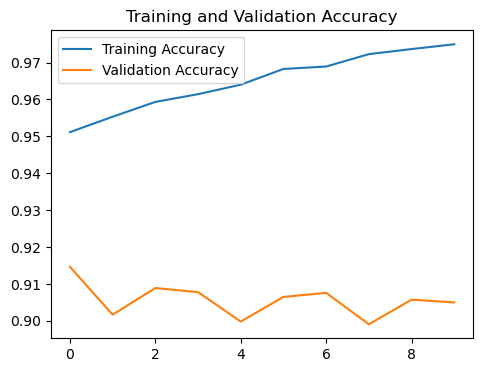

In [32]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Retrieve training and validation accuracy values from the history object
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

# Retrieve training and validation loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')




